# Relative attenuation vs wavelength and fit

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
from numpy.polynomial import polynomial as P

In [26]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates

In [27]:
plt.rcParams["axes.labelsize"]="large"
plt.rcParams["axes.linewidth"]=2.0
plt.rcParams["xtick.major.size"]=8
plt.rcParams["ytick.major.size"]=8
plt.rcParams["ytick.minor.size"]=5
plt.rcParams["xtick.labelsize"]="large"
plt.rcParams["ytick.labelsize"]="large"

plt.rcParams["figure.figsize"]=(20,10)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
#plt.rcParams['axes.facecolor'] = 'blue'
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['lines.markeredgewidth'] = 0.3 # the line width around the marker symbol
plt.rcParams['lines.markersize'] = 5  # markersize, in points
plt.rcParams['grid.alpha'] = 0.75 # transparency, between 0.0 and 1.0
plt.rcParams['grid.linestyle'] = '-' # simple line
plt.rcParams['grid.linewidth'] = 0.4 # in points

# Configuration

In [28]:
FLAG_FITPOLYNOM=False

# Load

## Load wavelength

In [29]:
Lambdas_ref=np.load("Lambdas_ref.npy")

## mask

In [30]:
mask= np.load("Mask.npy")

In [31]:
#mask

## Attenuation

https://stackoverflow.com/questions/13877063/how-to-save-numpy-masked-array-to-file

In [32]:
compressed=np.load("MAttenuation_mean_ALL.npy")

In [33]:
values = np.zeros_like(mask, dtype=compressed.dtype)

In [34]:
np.place(values, ~mask, compressed)

In [35]:
MAttenuation_mean_ALL = np.ma.MaskedArray(values, mask)

In [36]:
NWLBIN,Nobs=MAttenuation_mean_ALL.shape

In [37]:
#MAttenuation_mean_ALL

In [38]:
# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=Nobs)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(Nobs), alpha=1)


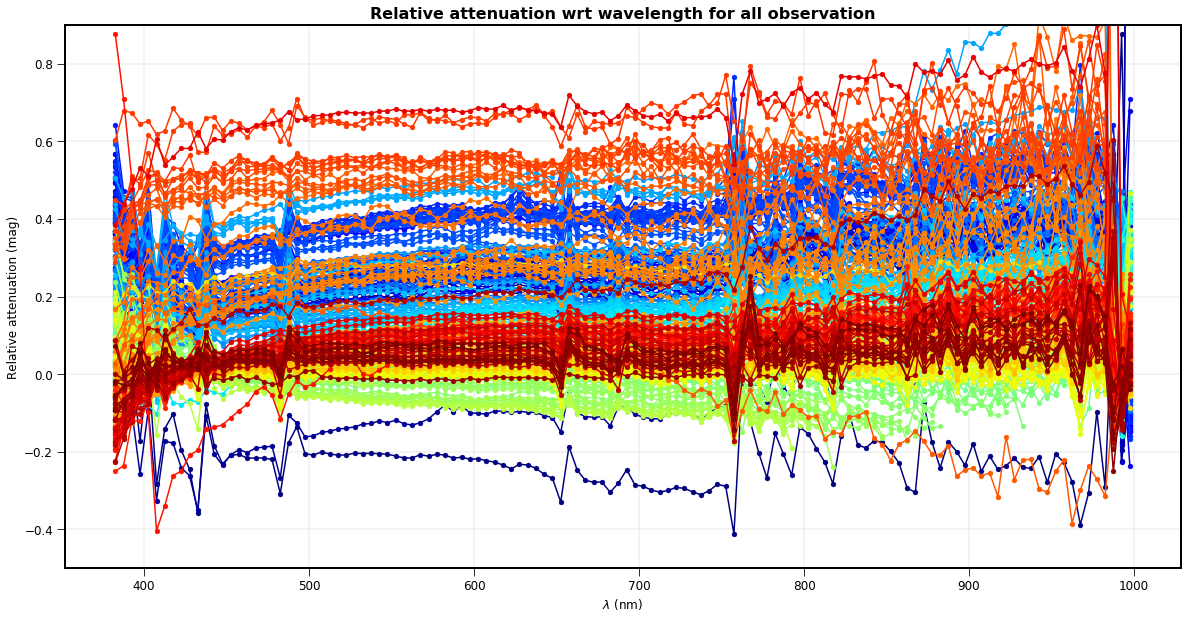

In [39]:
for idx in np.arange(Nobs):
    plt.plot(Lambdas_ref,MAttenuation_mean_ALL[:,idx],"o-",color=all_colors[idx])
plt.ylim(-0.5,0.9)
plt.xlabel("$\\lambda$ (nm)")
plt.ylabel("Relative attenuation (mag)")
plt.title("Relative attenuation wrt wavelength for all observation")
plt.grid()

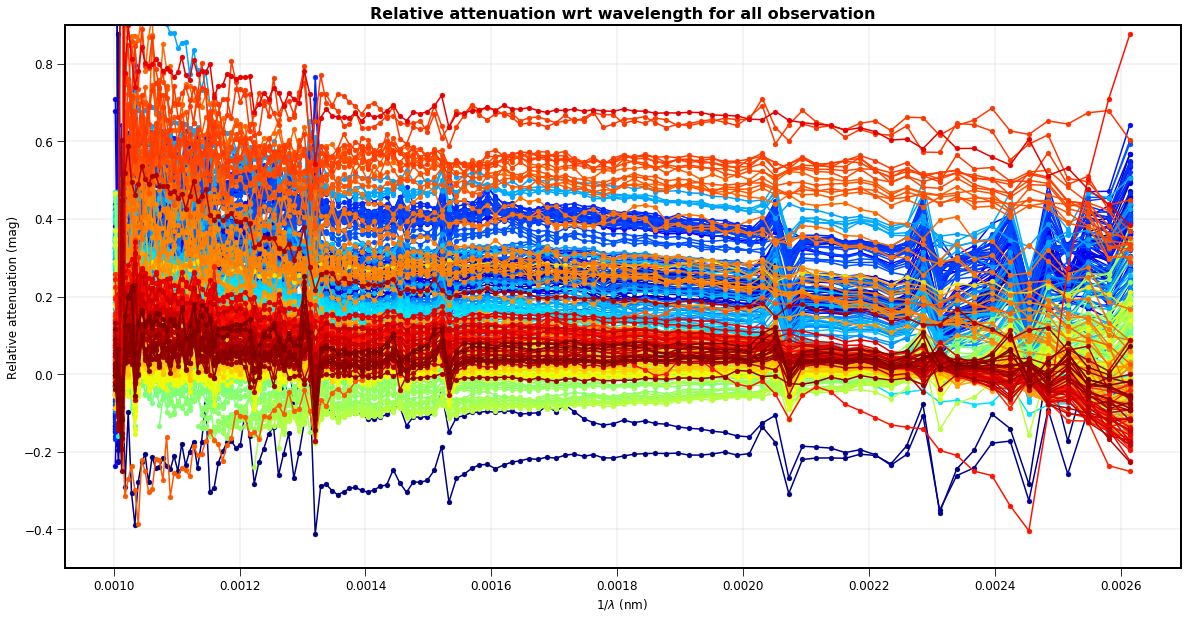

In [40]:
for idx in np.arange(Nobs):
    plt.plot(1/Lambdas_ref,MAttenuation_mean_ALL[:,idx], "o-",color=all_colors[idx])
plt.ylim(-0.5,0.9)
plt.xlabel("$1/\\lambda$ (nm)")
plt.ylabel("Relative attenuation (mag)")
plt.title("Relative attenuation wrt wavelength for all observation")
plt.grid()

# MAttenuation_Err_ALL

In [41]:
compressed = np.load("MAttenuation_Err_ALL.npy")
values = np.zeros_like(mask, dtype=compressed.dtype)
np.place(values, ~mask, compressed)
MAttenuation_Err_ALL = np.ma.MaskedArray(values, mask)

In [42]:
#MAttenuation_Err_ALL

In [43]:
#MAttenuation_Err_ALL.data

# Polynomial Fit

In [44]:
if FLAG_FITPOLYNOM:
    XMIN=1./1000.
    XMAX=1./380.
    XREF=1./700.
    deg=4
    Xfit=np.linspace(XMIN,XMAX,50)
    for idx in np.arange(Nobs):
        fig=plt.figure(figsize=(10,4))  
        ax = fig.add_subplot(1, 1, 1)
        event_str="observation {}".format(idx)
        ax.text(0.9, 0.9, event_str, horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
        plt.errorbar(1/Lambdas_ref,MAttenuation_mean_ALL[:,idx],yerr=MAttenuation_Err_ALL[:,idx], fmt="o",color=all_colors[idx])
        Z=P.polyfit(1/Lambdas_ref,MAttenuation_mean_ALL[:,idx],deg,w=MAttenuation_Err_ALL[:,idx])
    
        Yfit=P.polyval(Xfit,Z)
        plt.plot(Xfit,Yfit,'r-')
        plt.ylim(MAttenuation_mean_ALL[:,idx].min(),MAttenuation_mean_ALL[:,idx].max() )
        plt.xlim(XMIN,XMAX)
        plt.plot([XREF,XREF],[MAttenuation_mean_ALL[:,idx].min(),MAttenuation_mean_ALL[:,idx].max()],"k:")

    
        plt.xlabel("$1/\\lambda$ (nm)")
        plt.ylabel("Relative attenuation (mag)")
        plt.title("Relative attenuation wrt wavelength for all observation")
        plt.grid()
        plt.show()


In [45]:
if FLAG_FITPOLYNOM:
    XMIN=380.
    XMAX=1000.
    XREF=700.
    deg=4
    Xfit=np.linspace(XMIN,XMAX,50)

    for idx in np.arange(Nobs):
        fig=plt.figure(figsize=(10,4))  
        ax = fig.add_subplot(1, 1, 1)
        event_str="observation {}".format(idx)
        ax.text(0.9, 0.9, event_str, horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
        plt.errorbar(Lambdas_ref,MAttenuation_mean_ALL[:,idx],yerr=MAttenuation_Err_ALL[:,idx], fmt="o",color=all_colors[idx])
        plt.ylim(MAttenuation_mean_ALL[:,idx].min(),MAttenuation_mean_ALL[:,idx].max() )
        Z=P.polyfit(Lambdas_ref,MAttenuation_mean_ALL[:,idx],deg,w=MAttenuation_Err_ALL[:,idx])
        Yfit=P.polyval(Xfit,Z)
        plt.plot(Xfit,Yfit,'r-')
        plt.xlim(XMIN,XMAX)
        plt.plot([XREF,XREF],[MAttenuation_mean_ALL[:,idx].min(),MAttenuation_mean_ALL[:,idx].max()],"k:")
        plt.xlabel("$1/\\lambda$ (nm)")
        plt.ylabel("Relative attenuation (mag)")
        plt.title("Relative attenuation wrt wavelength for all observation")
        plt.grid()
        plt.show()